<a href="https://colab.research.google.com/github/ttogle918/ds-section2-sprint3/blob/main/n231-choose-your-ml-problems/n231a-choose-your-ml-problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 1*

# 📝 Assignment
---
# Choose your ML problems

이번 스프린트에서는 포트폴리오 프로젝트를 위해 수강생 각자가 정한 데이터셋을 사용하여 과제를 수행합니다. 프로젝트를 위한 데이터를 최종 선택하기 전에 여러 가능한 데이터세트를 살펴보고 간단한 모델까지 학습해 보는 것을 추천드립니다.

In [1]:
# !pip install category_encoders

In [2]:
# google 드라이브에 로컬 파일 업로드
from google.colab import files, drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. country : 와인의 원산지 국가
2. description : 와인의 맛, 향, 색깔, 느낌 등을 짧게 묘사한 문장
3. designation : 포도주를 만든 포도원
4. points : WineEnthusiast가 와인을 평가한 점수 (1 - 100, 80이상의 점수만 게시한다고 말했음)
5. price : 와인 한병의 가격
6. province : 와인이 생산된 주
7. region_1 : 주로 와인이 재배된 곳
8. region_2 : 때때로 와인이 재배되는 지역
9. variety : 와인을 만드는데 사용되는 포도의 종류
10. winery : 와인 공장 명

In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/code_states/winemag-data.csv")
df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez


In [4]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 0', 'description'], axis=1)

In [6]:
df.isnull().sum()

country            5
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [7]:
df['country'] = df['country'].fillna('')
df['price'] = df['price'].fillna(0)
df['province'] = df['province'].fillna('')
df['region_1'] = df['country'].fillna(df['region_2'])
df['region_2'] = df['country'].fillna(df['region_1'])


df['region_2'].isnull().sum()

0

In [8]:
df['region_1'].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', '',
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [9]:
df.duplicated().sum()

56428

In [10]:
print("drop_duplicates 전", df.shape)
df = df.drop_duplicates(keep='first')
print("drop_duplicates 후 : ", df.shape)

drop_duplicates 전 (150930, 9)
drop_duplicates 후 :  (94502, 9)


In [11]:
df.dtypes

country         object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [12]:
df.describe(include='all')

,country,designation,points,price,province,region_1,region_2,variety,winery
count,94502,65906,94502.000000,94502.000000,94502,94502,94502,94502,94502
unique,49,30621,NaN,NaN,456,49,49,632,14810
top,US,Reserve,NaN,NaN,California,US,US,Pinot Noir,Williams Selyem
freq,38962,1695,NaN,NaN,27748,38962,38962,8931,213
mean,NaN,NaN,87.935324,30.779095,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,3.221042,37.363951,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,80.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,86.000000,14.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,88.000000,22.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,90.000000,38.000000,NaN,NaN,NaN,NaN,NaN


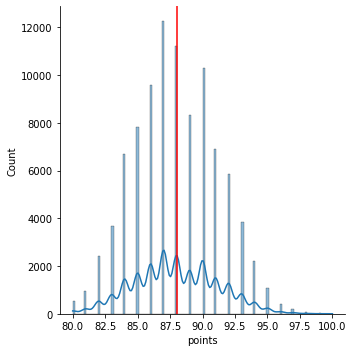

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df['points'],kde=True);
plt.axvline(88, color='red');

In [14]:
df['review'] = df['points'] >= 88   # 중간값(50%)
df = df.drop('points', axis=1)
df['review'].nunique()

2

In [15]:
df['review'].value_counts()

True     50521
False    43981
Name: review, dtype: int64

In [16]:
df['designation'].unique()

array(["Martha's Vineyard", 'Carodorum Selección Especial Reserva',
       'Special Selected Late Harvest', ..., 'Delaware Dolce',
       'Presidential 20-year old tawny', 'Bungalow Red'], dtype=object)

In [17]:
df['region_1'].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', '',
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [18]:
df['region_2'].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', '',
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [19]:
import seaborn as sns
corr = df.corr()
corr['review']
df_target_corr = corr[['review']].sort_values('review', ascending=False)
drop_features = df_target_corr[abs(df_target_corr['review']) < 0.02].index
df_target_corr

,review
review,1.000000
price,0.267545


### 1) 타겟으로 사용할 특성을 선택합니다.
- **(객관식) 다음과 같은 상황에 대한 설명 중 맞는 설명을 고르세요.**
    - 특성 3개를 사용해 가장 성능이 좋은 모델 A를 만들고 또 특성 5개를 사용해 최적의 모델 B를 학습하였습니다. 이때 모델 A에서 선택된 특성은 A1, A2, A3 입니다.
    1. 최적의 모델 B에는 특성 A1, A2, A3가 항상 선택됩니다.
    2. 최적의 모델 B 학습시 특성 A1, A2, A3는 전혀 사용되지 않습니다.
    3. 최적의 모델 B에 특성 A1, A2, A3가 선택될지 알 수 없습니다.

In [20]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.2, random_state=2)
train.shape, test.shape

((75601, 9), (18901, 9))

In [21]:
train, val= train_test_split(df, test_size=0.2, random_state=2)
train.shape, val.shape

((75601, 9), (18901, 9))

In [22]:
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 

target = 'review'

features = df.columns.drop([target, 'review'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


검증 정확도:  0.7144066451510502


In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Accuracy is: ", accuracy_score(y_train, y_pred))
print("\n\n\n",classification_report(y_train, y_pred))

Accuracy is:  0.9702913982619278



               precision    recall  f1-score   support

       False       0.97      0.97      0.97     35190
        True       0.97      0.97      0.97     40411

    accuracy                           0.97     75601
   macro avg       0.97      0.97      0.97     75601
weighted avg       0.97      0.97      0.97     75601



In [24]:
X_test = test[features]
y_test = test[target]
# y_pred = pipe.predict(X_test)

print('테스트 정확도: ', pipe.score(X_test, y_test))

테스트 정확도:  0.7144066451510502


In [25]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
# print("Accuracy is: ", accuracy_score(y_pred, y_test))
# print("\n\n\n",classification_report(y_pred, y_test))

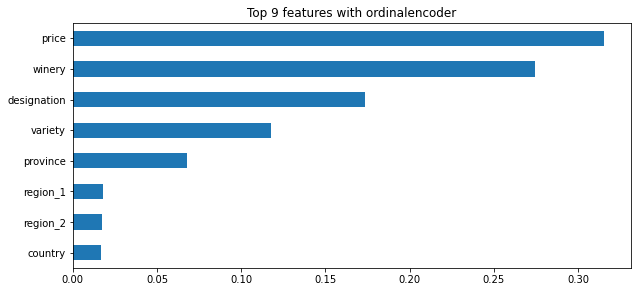

In [26]:
import matplotlib.pyplot as plt
# 특성 중요도(ordinal)
rf_ord = pipe.named_steps['randomforestclassifier']
importances_ord = pd.Series(rf_ord.feature_importances_, X_train.columns)

n=len(df.columns)
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features with ordinalencoder')
importances_ord.sort_values()[-n:].plot.barh();

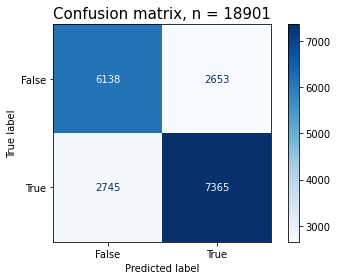

In [27]:
# Confusion matrix ( 성능 평가 지표 )
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues, ax=ax, values_format='')
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [28]:
# 임계값을 바꾸어 가며 정밀도, 재현율의 변화보기
from ipywidgets import interact, fixed
from sklearn.metrics import classification_report

threshold = 0.5
y_pred_proba = pipe.predict_proba(X_val)[:, 1]
y_pred = y_pred_proba > threshold

def explore_threshold(y_true, y_pred_proba, threshold=0.5):
    y_pred = y_pred_proba >= threshold
    vc = pd.Series(y_pred).value_counts()
    ax = sns.histplot(y_pred_proba, kde=True)
    ax.axvline(threshold, color='red')
    ax.set_title(f'# of target, 1={vc[1]}, 0={vc[0]}')
    plt.show()
    print(classification_report(y_true, y_pred))

interact(explore_threshold, 
    y_true=fixed(y_val), 
    y_pred_proba=fixed(y_pred_proba), 
    threshold=(0, 1, 0.01));

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

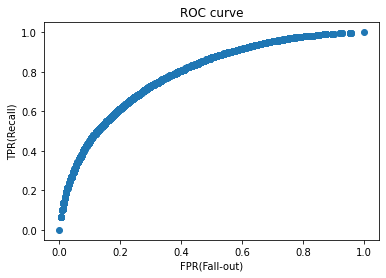

In [29]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [30]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.7885292439518385

### 2) 풀고자 하는 문제가 분류/회귀 문제인지 정합니다.
- **(객관식) 다음 설명 중 가장 틀린 항목을 고르세요.**
    1. 특정한 종목의 다음날 주식 종가를 예측하는 문제는 Supervised Learning 문제이다.
    2. 다음날 KOSPI 지수가 증가할지 감소할지 예측하는 문제는 Classification 문제이다.
    3. 축구 경기 도중에 승패를 예측하는 모델을 만들기 위해서는 실시간 통계 정보와 경기마다 승패 데이터가 필요하다.
    4. 이번 시즌 토트넘 선수들의 개인 통계 데이터(슛, 도움, ...)를 사용해서 다음 토트넘 경기의 승패를 예측할 수 있다.
   

In [31]:
### 이곳에서 과제를 진행해 주세요 ### 

### 3) 타겟의 분포를 분석하고 사용할 평가지표를 선택합니다. 평가지표를 선택한 이유를 설명하세요.
- 분류: 클래스가 몇 개인지? 클래스 비율이 어떤지(balance or imbalance)
- 회귀: 타겟 분포가 right-skewed 인지? log-transform을 사용할 것인지?
- 분류: 다수 클래스(majority class) 비율이 50%~70% 인 경우 정확도(accuracy)만 사용해도 무방합니다. 하지만 범위를 넘어설 경우 정확도만을 사용해서는 모델을 잘못 이해할 수 있습니다. 어떤 평가지표를 사용해야 할까요?
- 회귀: MAE, RMSE, R^2 등을 사용할 수 있습니다.
- **(객관식) 같은 데이터로 스팸을 예측하는 모델 A와 B를 만들었습니다. 다음 설명 중 가장 올바른 항목을 선택하고 과제 제출폼에 제출하세요.**
    1. A의 재현율은 80%이고 B의 재현율은 60%일 때 A가 더 좋은 모델이다.
    2. A의 정밀도는 80%이고 B의 정밀도는 60%일 때 A가 더 좋은 모델이다.
    3. A는 B보다 정밀도는 높지만 재현율은 낮다. A가 더 좋은 모델이다.
    4. A는 B보다 재현율은 높지만, 정밀도는 낮다. A가 더 좋은 모델이다.
    5. A는 B보다 정밀도, 재현율 모두 높다. A가 더 좋은 모델이다.

In [32]:
### 이곳에서 과제를 진행해 주세요 ### 

## 🔥 도전과제

### 4) 데이터를 훈련/검증/테스트 데이터로 나누고 전처리를 수행합니다. 그리고 간단한 모델을 사용해서 학습을 수행합니다.
- 이상치(outliers)가 있다면 어떻게 처리할 것인지 설명합니다.
- 무작위로 or 시간에 따라 데이터를 나눌 것인지 설명합니다.
- 모델 학습 결과를 리포팅 합니다.
- 정보 누수(leakage)가 있는지 확인해 봅니다.

In [33]:
### 이곳에서 과제를 진행해 주세요 ### 